In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline


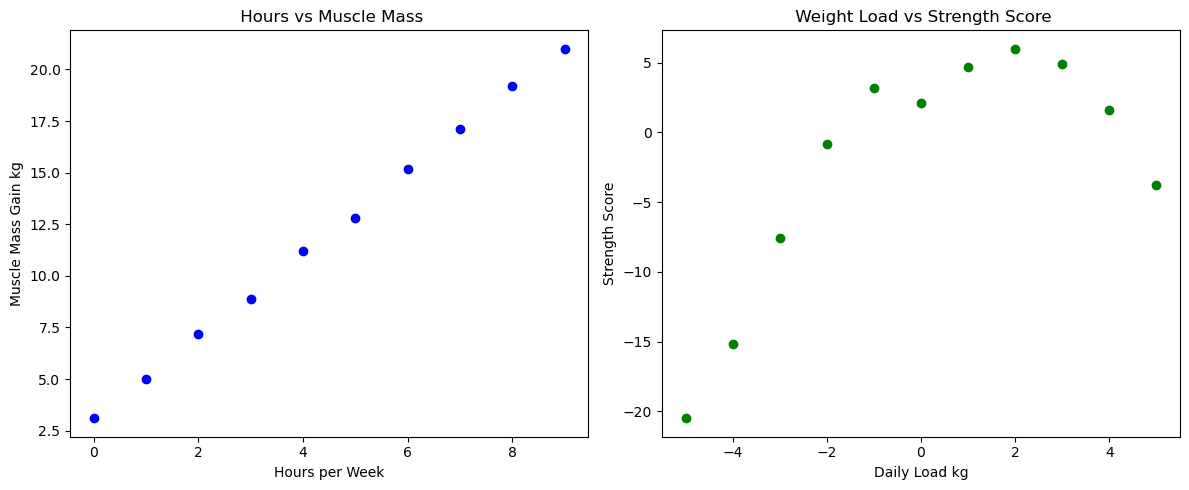

In [40]:
#question num 1
x1 = np.array([0,1,2,3,4,5,6,7,8,9])
y1 = np.array([3.1,5.0,7.2,8.9,11.2,12.8,15.2,17.1,19.2,21.0])

# Dataset 2
x2 = np.array([-5,-4,-3,-2,-1,0,1,2,3,4,5])
y2 = np.array([-20.5,-15.2,-7.6,-0.8,3.2,2.1,4.7,6.0,4.9,1.6,-3.8])

plt.figure(figsize=(12,5))

# Dataset 1
plt.subplot(1,2,1)
plt.scatter(x1, y1, color='blue')
plt.title(' Hours vs Muscle Mass')
plt.xlabel('Hours per Week')
plt.ylabel('Muscle Mass Gain kg')

# Dataset 2
plt.subplot(1,2,2)
plt.scatter(x2, y2, color='green')
plt.title(' Weight Load vs Strength Score')
plt.xlabel('Daily Load kg')
plt.ylabel('Strength Score')

plt.tight_layout()
plt.show()

# 1: קו ישר  — מתאים לרגרסיה ליניארית

# 2: צורה פרבולית (עקומה) — מתאים לרגרסיה פולינומית.

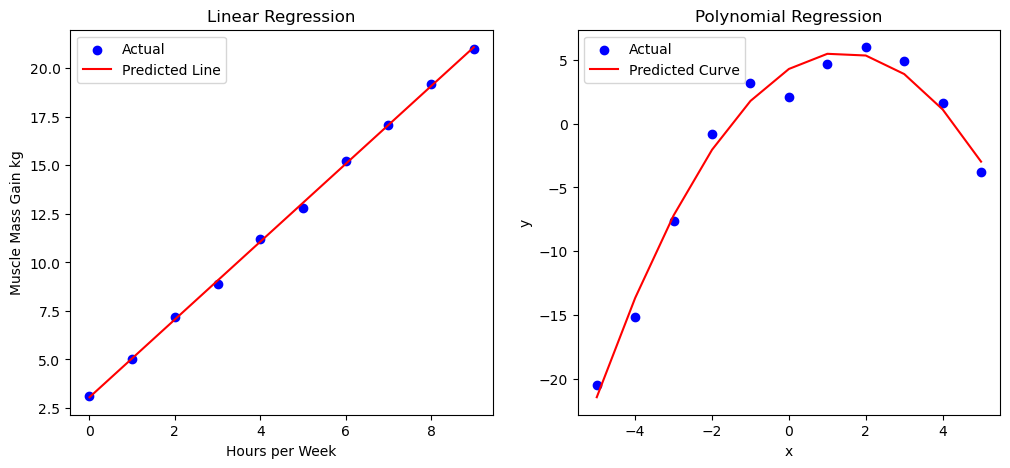

In [41]:
#question num 2
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
X1 = x1.reshape(-1,1)
model_1= LinearRegression()
model_1.fit(X1, y1)
y1_pred = model_1.predict(X1)

plt.scatter(x1, y1, color='blue', label='Actual')
plt.plot(x1, y1_pred, color='red', label='Predicted Line')
plt.title('Linear Regression')
plt.xlabel('Hours per Week')
plt.ylabel('Muscle Mass Gain kg')
plt.legend()

plt.subplot(1,2,2)
X2 = x2.reshape(-1,1)   

pipeline_model = Pipeline([
    ("poly_features", PolynomialFeatures(degree=2)),
    ("linear_regression", LinearRegression())
])

pipeline_model.fit(X2, y2)
y_pred_pipeline = pipeline_model.predict(X2)

plt.scatter(x2, y2, color='blue', label='Actual')
plt.plot(x2, y_pred_pipeline, color='red', label='Predicted Curve')
plt.title('Polynomial Regression')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

plt.show()

In [42]:
#question num 3 and 4
x2 = np.array([-5,-4,-3,-2,-1,0,1,2,3,4,5]).reshape(-1, 1)

x2_train, x2_test, y2_train, y2_test = train_test_split(
    x2, y2, test_size=0.2, random_state=42
)

poly = PolynomialFeatures(degree=2, include_bias=False)
x2_train_poly = poly.fit_transform(x2_train)
x2_test_poly = poly.transform(x2_test)


model = LinearRegression()
model.fit(x2_train_poly, y2_train)

y2_train_pred = model.predict(x2_train_poly)
y2_test_pred = model.predict(x2_test_poly)

print("Predictions on train:", y2_train_pred)
print("Predictions on test:", y2_test_pred)
print("X2_train:", x2_train.ravel())
print("y2_train:", y2_train)
print("X2_test:", x2_test.ravel())
print("y2_test:", y2_test)


Predictions on train: [ -3.83798529  -7.47472574 -14.69341129   4.27162025   2.45325002
   6.07172535  -1.75917198   6.36869868]
Predictions on test: [  5.16254024 -23.4152286    0.96838337]
X2_train: [ 5 -3 -4  3 -1  2 -2  1]
y2_train: [ -3.8  -7.6 -15.2   4.9   3.2   6.   -0.8   4.7]
X2_test: [ 0 -5  4]
y2_test: [  2.1 -20.5   1.6]


In [43]:
#question num 5

poly = PolynomialFeatures(degree=2)
x2_poly = poly.fit_transform(x2)

poly_model = LinearRegression()
poly_model.fit(x2_poly, y2)  

y2_pred = poly_model.predict(x2_poly)


mse2 = mean_squared_error(y2, y2_pred)
mae2 = mean_absolute_error(y2, y2_pred)
rmse2 = np.sqrt(mse2)
r2_2 = r2_score(y2, y2_pred)

print("MSE:", mse2)
print("MAE:", mae2)
print("RMSE:", rmse2)
print("R²:", r2_2)


MSE: 1.341301970756517
MAE: 1.0447043865225683
RMSE: 1.1581459194576982
R²: 0.9807079862229945


Optimal point (vertex): x* = 1.3991000529380597 , y* = 5.588699835632875


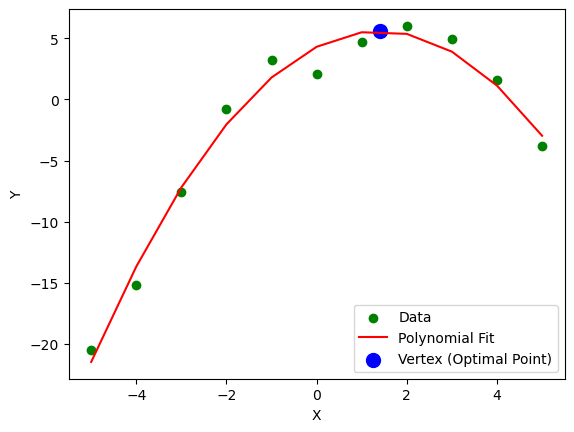

In [44]:
#question num 6

x2_poly = poly.fit_transform(x2)  
a = poly_model.coef_[2]  
b = poly_model.coef_[1] 
c = poly_model.intercept_  



x_vertex = -b / (2*a)
y_vertex = a*x_vertex**2 + b*x_vertex + c

print("Optimal point (vertex): x* =", x_vertex, ", y* =", y_vertex)

plt.scatter(x2, y2, color='green', label='Data')
plt.plot(x2, poly_model.predict(x2_poly), color='red', label='Polynomial Fit')  # ❌ poly_model
plt.scatter(x_vertex, y_vertex, color='blue', s=100, label='Vertex (Optimal Point)')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()


In [45]:
#question num 7

x1 = np.array([0,1,2,3,4,5,6,7,8,9]).reshape(-1, 1)

model = LinearRegression()
model.fit(x1, y1)

y1_pred = model.predict(x1)

mse = mean_squared_error(y1, y1_pred)      
mae = mean_absolute_error(y1, y1_pred)    
rmse = np.sqrt(mse)                  
r2 = r2_score(y1, y1_pred)                 

print("MSE:", mse)
print("MAE:", mae)
print("RMSE:", rmse)
print("R²:", r2)

MSE: 0.018024242424242307
MAE: 0.1159999999999997
RMSE: 0.13425439443177384
R²: 0.9994557585602966
